# KNN (K-Nearest Neighbours)

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org



# **Índice**

---

> [KNN (K-Nearest Neighbours)](#scrollTo=p7saRXpSclRT)
<br>
>>
>> [1 - Introducción a los Métodos basados en Casos y en Vecindad](#scrollTo=5JoDtc9NeEBB) \\
>>>[1.1. Similitud y Distancia](#scrollTo=HHrWs_Wggj3H) \\
>>>[1.2. Métodos Retardados y No Retardados](#scrollTo=6RO-vJmj_Ozc) \\
>>>[1.3. Ejemplos de Algoritmos Retardados y No Retardados](#scrollTo=EXJJMPDxCXIq) 
>>
>> [2 - K-NN](#scrollTo=S8hWG55glyAr) \\
>>>[2.1. K-NN en Clasificación](#scrollTo=cS1RoQlg9i21) \\
>>>[2.2. K-NN en Regresión](#scrollTo=y9ZAS4CdrfIT) \\
>>>[2.3. Aproximación Bayesiana a la Estimación de Funciones de Densidad](#scrollTo=yDVOPlFTJV5Z) 
>>
>> [3 - Ventajas y Desventajas](#scrollTo=1_ZDiRfmCVKX)
>>
>> [Actividad: Clasificación de *Churn* de *Orange Telecom*](#scrollTo=vKjY_If8s967)
>>> [Solución](#scrollTo=3xZoBjewtBKP)
>>
>> [IDEAS CLAVE](#scrollTo=grmvdDYc77Sf)

<br>

< [1 - Árboles de Decisión]() | 
[3 - Naive Bayes]() >

#**1. Introducción a los Métodos basados en Casos y en Vecindad**

Los métodos basados en casos y en vecindad se basan en el concepto de aprender a partir de ejemplos existentes previamente. Dichos ejemplos aportarán la información necesaria para poder predecir el comportamiento de un nuevo dato no perteneciente al conjunto de ejemplos.

Los métodos de aprendizaje automático basados en casos (***CBR*** de sus siglas en inglés ***Case-based Reasoning***) se centran en el uso de casos previamente resueltos para ayudar a resolver nuevos problemas. En este enfoque, se almacenan casos anteriores en algún tipo de almacén de datos (e.g., una base de datos) y se utilizan para encontrar soluciones similares a problemas nuevos. El sistema *CBR* compara el problema actual con los casos almacenados y encuentra la solución que mejor se adapte al nuevo problema.

Los métodos de aprendizaje automático basados en vecindad (***K-NN*** de sus siglas en inglés ***K-Nearest Neighbours**) se centran en la idea de que los puntos de datos similares tienden a agruparse en el espacio de características. El algoritmo *K-NN* encuentra los $k$ "vecinos" más cercanos al dato de entrada y utiliza estos vecinos para predecir su clase.

Ambos enfoques son útiles en diferentes situaciones. El aprendizaje automático basado en casos es efectivo en problemas donde la solución es un caso específico, mientras que los métodos basados en vecindad son útiles en problemas donde la predicción depdende de la similitud entre los datos.

De la descripción de los métodos basados en casos y en vecindad surgen dos cuestiones importantes:

* El concepto de **similitud**, que da lugar al concepto matemático opuesto de **distancia**.

* El momento en el que se procesa la similitud del nuevo dato con respecto a los ejemplos existentes, de lo que se derivan dos posibilidades: el preprocesamiento anticipativo o no retardado (***eager***) frente al procesamiento demorado o retardado (***lazy***).

##**1.1. Similitud y Distancia**

Los conceptos de similitud y distancia están relacionados por ser completamente opuestos. La similitud refiere a la medida de cuánto se parecen dos elementos, mientras que la distancia se refiere a la medida de cuánto difieren. En otras palabras, una medida de distancia mide la diferencia numérica entre dos elementos, mientras que una medida de similitud mide la cercanía entre dichos dos elementos. Se puede por tanto concluir que cuanto menos distantes, más similares.

Con ello, se puede computar matemáticamente la similitud entre dos elementos mediante la medida de su distancia, que no es más que una función que toma dos elementos y calcula un valor numérico de distancia entre ellos. 

Las medidas de distancia se utilizan en una amplia variedad de campos tales como la estadística, la física, la informática, el análisis de datos, y por supuesto, en el aprendizaje automático. En el análisis de datos, las medidas de distancia son especialmente útiles para comparar y clasificar objetos en función de su similitud o cercanía en el espacio de características. Por ejemplo, las medidas de distancia se utilizan comúnmente en la agrupación (*clustering*) de datos, la clasificación, y la reducción de dimensionalidad.

Existen muchas formas diferentes de medir la distancia entre dos puntos en un espacio de características. Algunas medidas comunes son:

* Distancia **Euclídea** [Johnson & Wichern, 2007]: Es la medida de distancia clásica utilizada en un espacio euclídeo para medir la longitud de la recta que une dos puntos. Matemáticamente:

$$ d(x,y) = \sqrt { \sum_1^n(x_i-y_i)^2 } $$

* Distancia de **Manhattan** [Deza & Deza, 2016]: Se basa en medir la distancia por cuadras (*city-block*) como se haría al recorrer las diferentes manzanas de Manhattan, zigzagueando entre ellas. Matemáticamente:

$$ d(x,y) = \sum_1^n |x_i-y_i| $$

* Distancia de **Mahalanobis** [Mahalanobis, 1936]: A diferencia de la mayoría de distancias que asumen en cierto modo que los atributos son independientes (cada atributo está en una dimensión ortogonal a las demás), la distancia de Mahalanobis utiliza la matriz de covarianzas $S$, resultando en una métrica más robusta. Matemáticamente:

$$ d(x,y) = \sqrt {(x-y)^TS^{-1}(x-y)} $$

* Distancia de **Jaccard** [Jaccard, 1912]: Se utiliza para medir la similitud entre dos conjuntos de datos binarios, es decir, conjuntos que contienen únicamente elementos 0 ó 1. Se calcula como la proporción entre el número de elementos que están en ambos conjuntos y el número total de elementos que están en almenos uno de los dos conjuntos. Matemáticamente:

$$ d(A,B) = 1- \frac{|A \cap B|}{|A \cup B|} $$

* Distancia de **Hamming** [Hamming, 1950]: Se utiliza para comparar la similitud entre dos cadenas de caracteres o dos vectores binarios del mismo tamaño, y se basa en contar el número de posiciones en las que las dos cadenas o vectores difieren y divide este número por la longitud total de las cadenas o vectores. Matemáticamente:

$$ d(a,b) = \frac{1}{n} \sum_1^n a_i \neq b_i $$

* Distancia de **Chebychev** [Minkowski, 1908]: Calcula la discrepancia más grande en alguna de las dimensiones. Matemáticamente:

$$ d(x,y)=max_{1..n} |x_i-y_i| $$

* Distancia de **Spearman** [Spearman, 1904]: También conocida como coeficiente de correlación de Spearman, se utiliza para medir la correlación entre dos variables, espcialmente cuando no tienen una distribución normal. Se basa en la clasificación de los valores de las variables en rangos y en la comparación de los rangos de los valores de las dos variables. Matemáticamente:

$$ d(x,y) = \sum_1^n (rank(x_i)-rank(y_i))^2 $$

* Distancia del **coseno** [Deza & Deza, 2009]. Considerando cada ejemplo un vector, esta distancia viene representada por el coseno del ángulo que forman. Es una de las medidas de distancia más utilizadas en recuperación de información y en aprendizaje automático. Matemáticamente:

$$ d(u,v) = arccos (\frac{u^Tv}{||u|| \cdot ||v||}) $$



<br/>
<p><mark>IMPORTANTE</mark></p>
<hr/>

Cada una de las anteriores medidas de distancia tiene sus propias propiedades y se utiliza para diferentes propósitos según la naturaleza de los datos y el contexto de aplicación.

##**1.2. Métodos Retardados y No Retardados**

Como hemos comentado, en el aprendizaje automático basado en casos o por vecindad, se pueden distinguir dos enfoques diferentes: métodos **retardados** (*lazy*) y métodos **no retardados** (*eager*).

Los métodos **retardados**, también conocidos como métodos basados en recuperación, se basan en la búsqueda en un conjunto de casos previos y la selección del caso más cercano al caso actual a clasificar. Estos métodos son retardados porque el proceso de clasificación se lleva a cabo después de la recuperación del caso correspondiente del conjunto de datos previous. 

Los métodos retardados tienen la **ventaja** de ser más precisos cuando se tiene una gran cantidad de datos de entrenamiento. Su principal **inconveniente** es que pueden ser lentos y requerir una gran cantidad de memoria para almacenar la base de datos de casos.

Por otro lado, los métodos **no retardados**, también conocidos como métodos basados en modelos, se basan en la construcción de un modelo a partir de los datos de entrenamiento y luego utilizan este modelo para clasificar nuevos casos.

Estos métodos son no retardados porque el proceso de clasificación se lleva a cabo de forma directa y no se requiere la búsqueda en una base de casos previos.

Los métodos no retardados tienen la **ventaja** de ser más rápidos y menos costosos en términos de memoria que los retardados, pero tienen el **inconveniente** de que pueden ser menos precisos cuando la cantidad de datos de entrenamiento es pequeña o cuando la complejidad del modelo es alta.

En general, la elección entre métodos retardados y no retardados depende del tamaño y la complejidad del conjunto de datos de entrenamiento, así como de la precisión y eficiencia requeridas en el proceso de clasificación.

<br/>
<p><mark>EN RESUMEN</mark></p>
<hr/>

Los métodos retardados son más precisos pero más lentos y requieren más memoria, mientras que los métodos no retardados son más rápidos pero menos precisos y requieren menos memoria.


##**1.3. Ejemplos de Algoritmos Retardados y No Retardados**

Como ejemplos de algoritmos **retardados** tendríamos:

* ***K-NN*** (***K-Nearest Neighbour***) [Cover & Hart, 1967; Altman, 1992]: Es un algoritmo que clasifica nuevos casos basándose en los casos más cercanos en un conjunto de casos previos. Utiliza una medida de distancia para calcular la similitud entre el nuevo caso y los casos existentes en la base de datos y selecciona los $k$ casos más cercanos. Luego, la etiqueta del nuevo caso se asigna según la mayoría de las etiquetas de los $k$ casos más cercanos.

* ***CBLOF*** (***Clustering-Based Local Outlier Factor***) [Tang *et al.*, 2002]: Es un algoritmo que detecta valores atípicos en un conjunto de datos basándose en la comparación de las características del nuevo caso con los casos existentes en el almacén de datos. *CBLOF* utiliza un método de clustering para identificar regiones de alta densidad en los datos y luego calcula el factor de valor atípico local para cada caso. Este factor se utiliza para determinar si un caso es un valor atípico o no.

* ***CBR-RS*** (***Case-Based Reasoning Recommender System***) [Smyth, 1994]: Es un sistema de recomendación que utiliza un almacén de datos de casos previos para hacer recomendaciones a un usuario. *CBR-RS* utiliza una medida de similitud para encontrar casos similares a la consulta del usuario y luego recomienda productos o servicios que fueron utilizados en esos casos similares.

Como ejemplos de algoritmos **no retardados** tendríamos:

* ***MBR*** (***Memory-Based Reasoning***) [Berkhin, 2006]: Es un enfoque basado en votación para predecir la etiqueta de clase del nuevo dato a partir de las etiquetas de clase de los *k* casos con mayor similitud.

* ***WVA*** (***Weighted Voting-Based Algorithm***): Para el entrenamiento del modelo, se calcula un peso para cada caso de entrenamiento según su similitud con el caso de consulta. Luego, se realiza una votación ponderada para las etiquetas de clase de los casos de entrenamiento y se asigna la etiqueta de clase con la mayoría de los votos ponderados al nuevo caso.

* ***CIRA*** (***Case-Indexed Retrieval and Analysis***) [Sánchez *et al.*, 2007]: Utiliza un índice de casos para reducir el tiempo de búsqueda y mejorar la eficiencia. Este índice se construye basándose en las características de los casos de entrenamiento y se utiliza para realizar una búsqueda eficiente en la base de datos. *CIRA* también realiza un análisis de casos para seleccionar los más relevantes para el nuevo caso y mejorar así la precisión de la clasificación.



#**2. K-NN**

El algoritmo de ***K-Nearest Neighbors*** (***K-NN***) es un método de aprendizaje automático de **clasificación** y **regresión** que se basa en clasificar las nuevas instancias en función de su similitud con el conjunto de entrenamiento.

El enfoque de *K-NN* se basa en la suposición de que los elementos similares se agrupan en la misma clase o categoría. El método funciona mediante la búsqueda de los $K$ elementos más cercanos en el conjunto de datos de entrenamiento para cada instancia desconocida, y luego asigna la clase más frecuente entre esos $K$ vecinos a la instancia.

En resumen, este algoritmo busca predecir el valor de una nueva instancia basándose en los valores de las instancias más cercanas en el espacio de características.

Matemáticamente, el algoritmo de *K-NN* se puede definir de la siguiente manera: 

* Dado un conjunto de entrenamiento $X$ y un conjunto de prueba $x$, se busca los $K$ elementos más cercanos a $x$ en $X$ usando alguna medida de distancia. 

* La búsqueda de los $K$ vecinos más cercanos se realiza en el espacio de características y utiliza sus etiquetas (en el caso de la clasificación) o valores de atributos (en el caso de la regresión) para predecir la etiqueta o valor de la instancia de pruebas, que se obtiene como la clase más común entre los $K$ vecinos más cercanos. 

* La medida de distancia utilizada puede variar, pero comúnmente se utiliza alguna de las distancias vistas en el Apartado 1.1.

* El valor de $K$ se puede elegir mediante algún método de selección de hiperparámetros o por intuición.


## **2.1. K-NN en Clasificación**

Siguiendo el algoritmo descrito, un nuevo ejemplo será clasificado en función de la clase mayoritaria de los $k$ ejemplos existentes que estén más cerca según alguna medida de distancia del ejemplo dado.

Veamos un ejemplo:

![Ejemplo de clasificación con K-NN](https://deepnote.com/publish/af445808-b022-4173-b942-5538c569adaf/befd7d3b-16ab-47a8-a217-eb3145cd8cc4/file?path=%2Fimage-20220217-091723.png)

<small>Fuente: https://deepnote.com/@kylie-defeo/KNN-af445808-b022-4173-b942-5538c569adaf</small>

Si consideramos el anterior ejemplo, donde tenemos:

* Dos clases, la clase $A$ representada por estrellas rojas, y la clase $B$ representada por triángulos verdes.

* Dos dimensiones, $X_1$ y $X_2$ representada visualmente en los ejes $X$ e $Y$ de un gráfico bidimensional.

* Siete ejemplos de la clase $A$ y ocho ejemplos de la clase $B$, y un nuevo ejemplo a ser etiquetado representado por el interrogante $?$.

Si fijamos $K=3$, tomaríamos los tres ejemplos más cercanos al ejemplo $?$ a etiquetar, y seleccionaríamos la clase con más ejemplos. En este caso, la clase $B$.

<br/>
<p><mark>IMPORTANTE</mark></p>
<hr/>

Como fácilmente se puede deducir del ejemplo anterior, tendremos problemas en determinar la clase con más ejemplos si tenemos el mismo número de ejemplos por clase, algo que sólo puede suceder cuando $K$ es par. Por lo que para evitar problemas, se suele elegir un valor de $K$ impar.


Veámoslo con un ejemplo en Python. 

Primero, preparamos el entorno cargando las librerías necesarias.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Creamos una función en la que podamos dibujar los puntos de train, test y predicciones realizadas con el modelo.

In [31]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, k):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black'
                )
    subtitle = "Áreas de decisión definidas por el modelo k-NN con k=" + str(k)
    plt.suptitle(subtitle)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

Generamos una serie de puntos en un espacio bidimensional que nos servirán para realizar la clasificación.

Se recomienda jugar con los parámetros *n_samples* y *noise* para ver su efecto en el modelo generado.

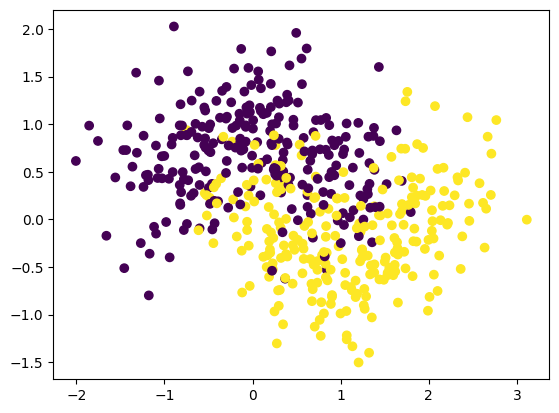

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
n_samples = 500
noise = 0.4

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

print(type(X))
print(type(y))

Realizamos una partición aleatoria entre entrenamiento y validación, siguiendo una proporción dada por el parámetro *test_size*.

(400, 2) (400,)
(100, 2) (100,)


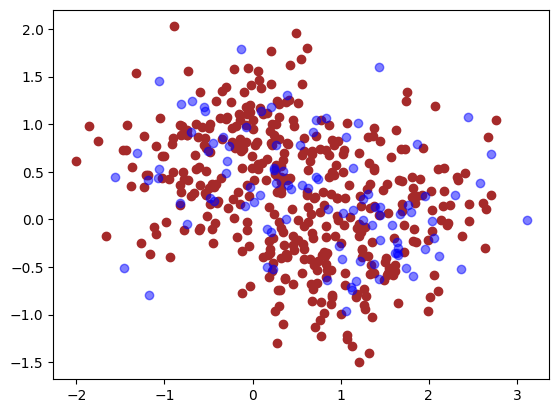

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
test_size=0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=test_size)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

plt.scatter(x=X_train[:,0], y=X_train[:,1], c="brown")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c="blue", alpha=0.5)
plt.show()


print(type(X_train))
print(type(y_train))

A continuación generamos un modelo de clasificación basado en K-NN. 

Se recomienda jugar con los parámetros *k* (número de vecinos) y *metric* (medida de distancia).

En cuanto al parámetro *weights* lo dejamos aquí como *uniform*, que significa que cada punto en la vecindad contribuye de igual manera que el resto. Más adelante veremos otra posibilidad.


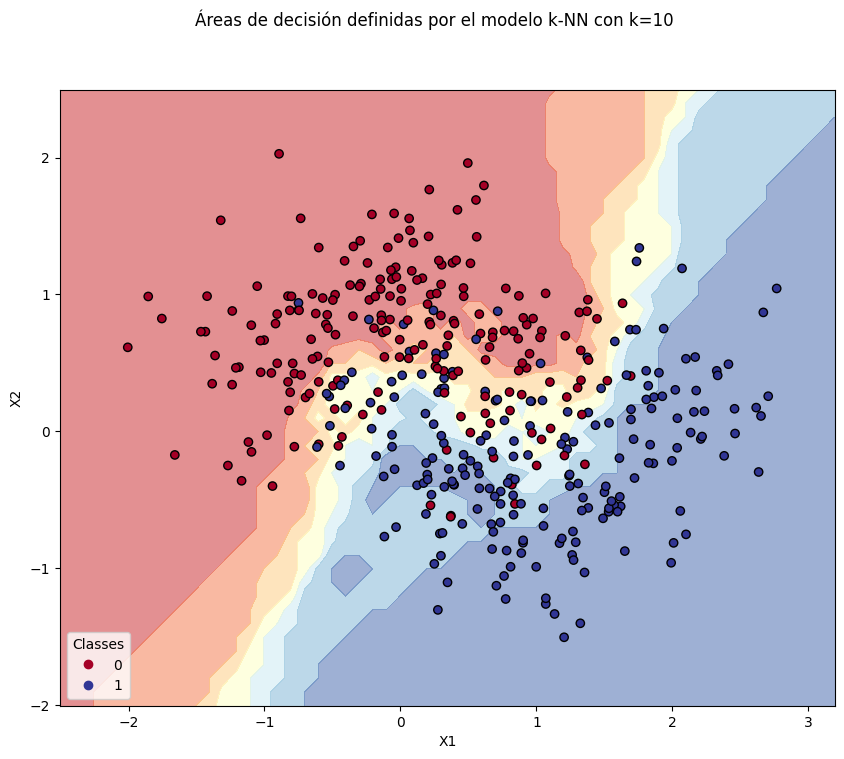

Precisión sobre los datos de entrenamiento: 87.50
Precisión sobre los datos de test: 87.00


In [34]:
k=10  # Prueba k=[3..99]
metric="euclidean"  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric=metric) # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)

plt.figure(figsize=(10,8))
plot_boundaries_test(X_train, y_train, knn_model, True, X_train, y_train, k)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))

Generamos la matriz de confusión.

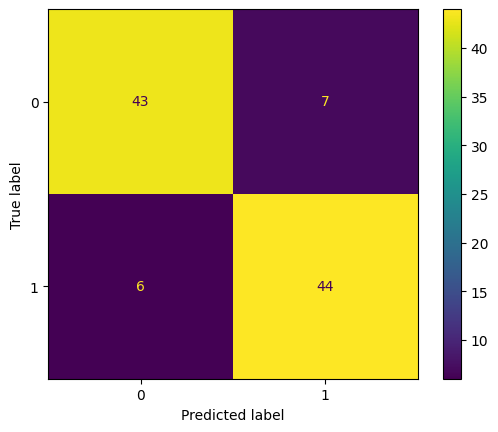

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Asentemos conocimientos calculando todas las métricas de evaluación que vimos en el primer apartado del módulo.

In [36]:
a = cm[0,0]
b=cm[0,1]
c=cm[1,0]
d=cm[1,1]

TP=d/(c+d)
FP=b/(a+b)
TN=a/(a+b)
FN=c/(c+d)

accuracy = (a+d)/(a+b+c+d)
error = 1-accuracy
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F=2*(precision*recall)/(precision+recall)

print("TP: ", round(TP,4))
print("TN: ", round(TN,4))
print("FP: ", round(FP,4))
print("FN: ", round(FN,4))

print("Accuracy: ", round(accuracy,4))
print("Error: ", round(error,4))
print("Precision: ", round(precision,4))
print("Recall: ", round(recall,4))
print("F-meassure: ", round(F,4))

TP:  0.88
TN:  0.86
FP:  0.14
FN:  0.12
Accuracy:  0.87
Error:  0.13
Precision:  0.8627
Recall:  0.88
F-meassure:  0.8713


**Vamos a probar con weights = "distance"**

Esto quiere decir que vamos a tener en cuenta la distancia de cada una de los $k$ puntos seleccionados hasta el punto objetivo. No se predice por conteo sino por cálculo de distancias.

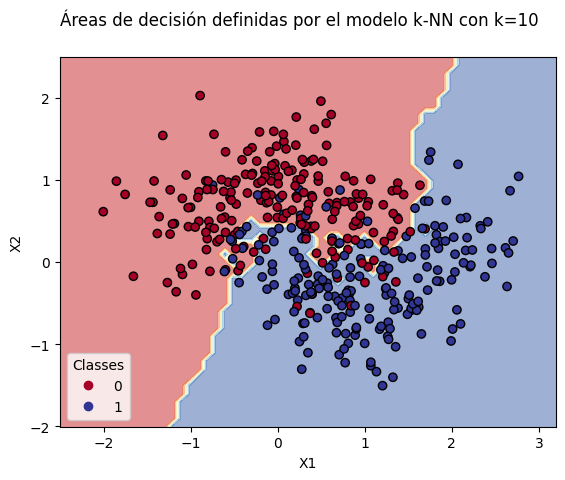

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 82.00


In [37]:
knn_model = KNeighborsClassifier(n_neighbors=k, weights="distance", metric=metric)
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)

plot_boundaries_test(X_train, y_train, knn_model, False, X_train, y_train, k)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))


El modelo (la frontera) es el mismo que con el parámetro *weithgs="uniform"*, pero al realizar los cálculos se tiene en cuenta las distancias y no sólo el conteo de puntos, haciendo de este modo que la frontera no sea tan decisiva en la clasificación.

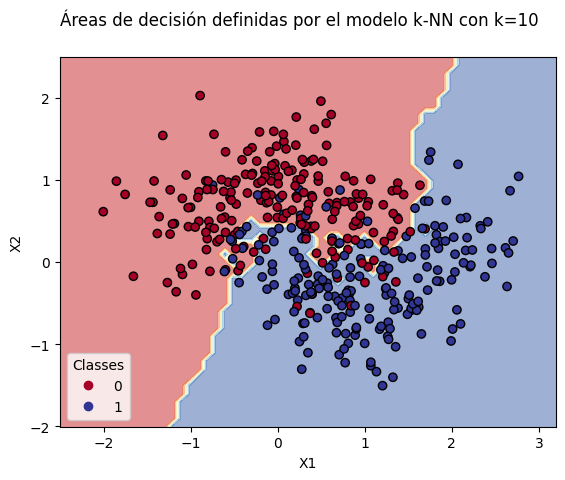

In [38]:
plot_boundaries_test(X_train, y_train, knn_model, False, X_train, pred_train, k)

Generamos la matriz de confusión.

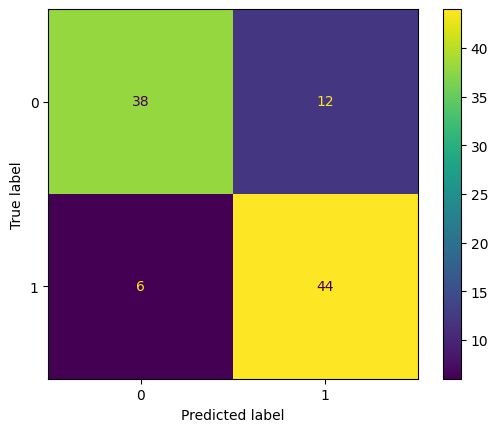

In [39]:
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Y calculamos todas las métricas de evaluación que vimos en el primer apartado del módulo.

In [40]:
a = cm[0,0]
b=cm[0,1]
c=cm[1,0]
d=cm[1,1]

TP=d/(c+d)
FP=b/(a+b)
TN=a/(a+b)
FN=c/(c+d)

accuracy = (a+d)/(a+b+c+d)
error = 1-accuracy
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F=2*(precision*recall)/(precision+recall)

print("TP: ", round(TP,4))
print("TN: ", round(TN,4))
print("FP: ", round(FP,4))
print("FN: ", round(FN,4))

print("Accuracy: ", round(accuracy,4))
print("Error: ", round(error,4))
print("Precision: ", round(precision,4))
print("Recall: ", round(recall,4))
print("F-meassure: ", round(F,4))

TP:  0.88
TN:  0.76
FP:  0.24
FN:  0.12
Accuracy:  0.82
Error:  0.18
Precision:  0.7857
Recall:  0.88
F-meassure:  0.8302


**Calculemos cuál es el valor de *k* que mejor rendimiento obtiene**

Se recomienda jugar con diferentes rangos (*min* y *max*) así como el incremento (*hop*) para ver más o menos detalle de lo que sucede al variar el número de vecinos.

In [41]:
min=1
max=200
hop=1

k_list = []
score_train_list = []
score_test_list = []

for K in list(range(min,max,hop)):
  knn_model = KNeighborsClassifier(n_neighbors=K, weights="uniform", metric=metric)
  knn_model.fit(X_train, y_train)

  ## Generación de listas
  k_list.append(K)
  score_train_list.append(100.0*knn_model.score(X_train, y_train))
  score_test_list.append(100.0*knn_model.score(X_test, y_test))

df = pd.DataFrame({"K":k_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

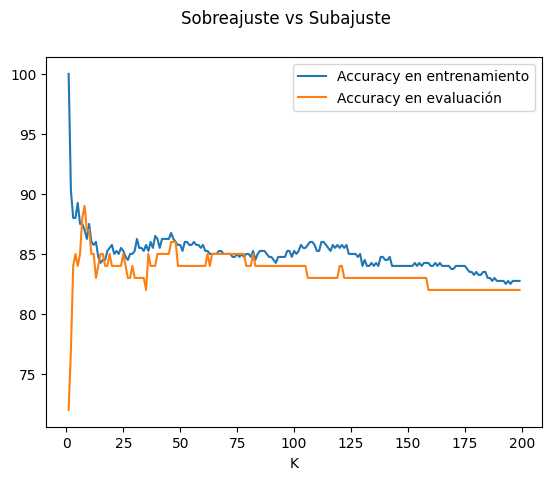

In [42]:
df.set_index("K", inplace=True)
df["score_train"].plot(label="Accuracy en entrenamiento")
df["score_test"].plot(label="Accuracy en evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

<br>
<p><mark>RECUERDA</mark></p>
<hr/>

En términos de rendimiento, se espera que la curva en el conjunto de datos de entrenamiento siempre esté por encima del conjunto de validación. 

Sin embargo, cuando esta distancia es muy elevada, estamos hablando de sobreajuste.

El rendimiento de un clasificador, como vimos, se puede medir con diferentes métricas como *accuracy*, *error*, *precision*, *recall*, *f-measure*, y otras muchas. La métrica *accuracy* sólo es un buen indicador del rendimiento cuando el clasificador trabaja con conjuntos de datos completamente equilibrados. Es decir, con el mismo número de ejemplos en todas las clases. Si no, mejor utilizar otras métricas como *f-measure* que tienen en cuenta (ponderan) este desequilibrio, o incluso por métricas específicas que resalten el objetivo de negocio. 

En el ejemplo anterior, nos ha servido para seleccionar el mejor valor de $k$ para el problema dado.

## **2.2 K-NN en Regresión**

Como hemos comentado, *k-NN* puede también ser aplicado a problemas de regresión. En este caso la única diferencia es que en lugar de contar el número de $k$ vecinos (ponderados o no por la distancia) se calcula la media de sus valores $y_1, y_2, ..., y_n$.


Veámoslo con un ejemplo en Python. 

Primero, preparamos el entorno cargando las librerías necesarias.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generamos de manera aleatoria un conjunto de ejemplos siguiendo una distribución Gausiana isotrópica (es decir, todos los puntos se extienden igual en todas las direcciones alrededor del centro). Por ello, introducimos un pequeño desplazamiento en las muestras para poder diferenciarlas visualmente y ver cómo afecta al clasificador.

Se recomienda jugar con los diferentes parámetros de generación de los datos para ver su impacto en los resultados.

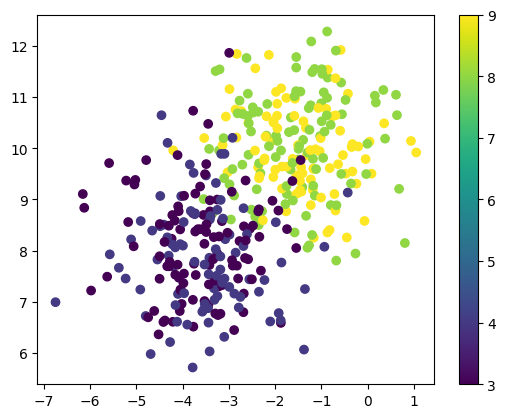

In [44]:
n_samples=400
centers=1

min_s_1=8     # Valor original 8
max_s_1=10    # Valor original 10
min_s_2=3     # Valor original 3
max_s_2=5     # Valor original 5

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=n_samples, random_state=42,centers=centers)
y[0:round(n_samples/2)] = np.random.randint(min_s_1, max_s_1, round(n_samples/2))
y[round(n_samples/2):n_samples] = np.random.randint(min_s_2, max_s_2, round(n_samples/2))
X[0:round(n_samples/2)] = X[0:round(n_samples/2)]+1 
X[round(n_samples/2):n_samples] = X[round(n_samples/2):n_samples]-1
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.colorbar()
plt.show()

In [45]:
print(y.min())
print(y.max())
print(X.min())
print(X.max())


3
9
-6.750464963121823
12.28497898600272


**Preprocesado**

*K-NN* es un modelo en el que se calculan distancias (con unas métricas u otras) y por tanto tiene una base geométrica. 

Estas distancias se calculan en espacios $n$-dimensionales, donde "$n$" es el número de variables predictoras ($X_1, X_2, ..., X_n$).

Imaginemos que tenemos un caso muy sencillo con sólo dos variables predictoras $X_1$ y $X_2$.

* $X_1$ con valores en el rango $[0, 1]$. 

* $X_2$ con valores en el rango $[0, 1000]$.

El plano en el que trabajaremos será un plano "estirado" con un eje $X$ en $[0,1]$ y un eje $Y$ en $[0,1000]$. 

En nuestro ejemplo tenemos dos variables predictoras en diferentes rangos (dependiendo de los parámetros de generación):

* $X_1$ en el rango $[-6.75, 12.28]$.
* $X_2$ en el rango $[3, 9]$.

Para que *K-NN* funcione bien, precisa de calcular las distancias entre puntos que están en una zona común del espacio/plano.

Para ello, necesitamos escalar los datos de las variables predictoras, por ejemplo, con el siguiente código usando la librería *Scilit-Learn*:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(X).transform(X)
```

Con ello, lo que obtenemos es una serie de variables con $\mu=0$ y $\sigma=1$.



















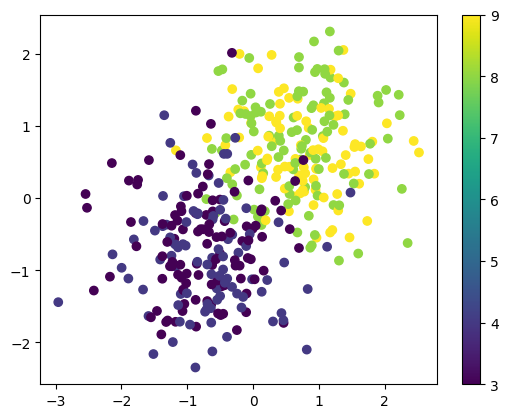

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit(X).transform(X)
plt.scatter(x=Xs[:,0], y=Xs[:,1], c=y)
plt.colorbar()
plt.show()

Particionamos el conjunto de datos entre entrenamiento y validación siguiendo la proporción dada por el parámetro *test_size*.

In [47]:
test_size=0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size)

Y ajustamos el regresor basado en *K-NN* en base a los parámetros *k*, *weights*, y *metric*.

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

0.7288375558867363


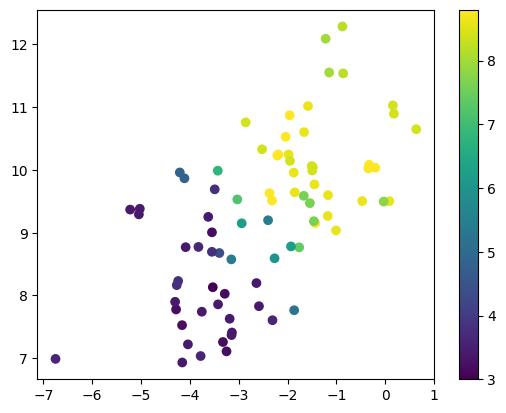

In [49]:
k=5
weights="uniform"
metric="euclidean"

knn_reg = KNeighborsRegressor(n_neighbors=k, weights=weights, metric=metric)  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
knn_reg.fit(X_train,y_train)
y_pred = knn_reg.predict(X_test)
print(r2_score(y_test,y_pred))

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.colorbar();

**Calculemos cuál es el valor de *k* que mejor rendimiento obtiene**

Se recomienda jugar con diferentes rangos (*min* y *max*) así como el incremento (*hop*) para ver más o menos detalle de lo que sucede al variar el número de vecinos.

In [50]:
min=1
max=50
hop=1

k_list = []
score_train_list = []
score_test_list = []

for K in list(range(min,max,hop)):
  knn_model = KNeighborsClassifier(n_neighbors=K, weights=weights, metric=metric)
  knn_model.fit(X_train, y_train)

  ## Generación de listas
  k_list.append(K)
  score_train_list.append(100.0*knn_model.score(X_train, y_train))
  score_test_list.append(100.0*knn_model.score(X_test, y_test))

df = pd.DataFrame({"K":k_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

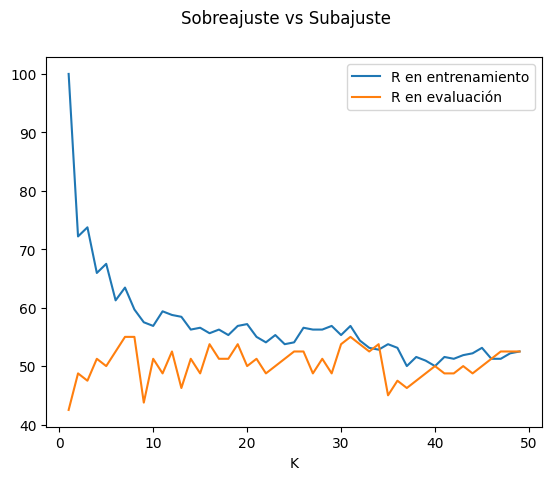

In [51]:
df.set_index("K", inplace=True)
df["score_train"].plot(label="R en entrenamiento")
df["score_test"].plot(label="R en evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

##**2.3. Aproximación Bayesiana a la Estimación de Funciones de Densidad**

Una versión elaborada de *K-NN* se basa en determinar una región de cercanía en lugar de un valor fijo $K$ de ejemplos con los que comparar. Para ello se utiliza la **estimación Bayesiana de funciones de densidad**.

Partamos de un conjunto de datos con $q$ clases representadas como $A=\{A_1, ..., A_q\}$.

Se pueden calcular las probabilidades a *priori* de una clase calculando la frecuencia de ejemplos de dicha clase con respecto al total:

$$P(A_i)=\frac{|Ai|}{\sum_j |A_j|}$$

Donde:

> $|A_i|$ es el número de ejemplos pertenecientes a la clase $i$.

Aplicando el Teorema de Bayes, podemos calcular la probabilidad a *posteriori* aplicando la siguiente fórmula:

$$ P(A_i|x) = \frac{P(A_i) \cdot p(x|A_i)}{\sum_{j=1}^q P(A_j) \cdot p(x|A_j)} $$

Donde:

> $p(x|A_i)$ es la probabilidad de que $x$ tome determinados valores sabiendo que pertenece a la clase $A_i$ y que se puede calcular fácilmente a partir de los ejemplos existentes.

Por lo que podemos maximizar la probabilidad a *posteriori* $p(A_i|x) mediante la fórmula:

$$ arg\,max_i p(A_i|x) = arg\,max_i p(A_i) \cdot p(x|A_i) $$

Ya que el denominador sería común a todas las clases y se puede eliminar.

Si los atributos de los ejemplos tienen distribuciones continuas, se podrían sustituir todas las probabilidades por funciones de densidad de probabilidad, quedando la siguiente expresión:

$$ p(A_i|x) = \frac{p(A_i) \cdot f(x)}{\sum_{j=1}^q p(A_j) \cdot f_j(x)} $$


Ahora, si el número de ejemplos es suficientemente representativo, se puede calcular la probabilidad de que un nuevo ejemplo $x$ caiga dentro de una región $R$ mediante la expresión:

$$ p_R(x) = \frac{k_n}{n} $$

Donde:

> $k_n$ es el número de ejemplos dentro de la región $R$.

> n el número total de ejemplos.


Para el cálculo de $k_n$ se requiere de una función de distancia $d$ que permitirá determinar que un nuevo ejemplo está dentro de la región $R$ si su distancia al dato $x$ es menor de un determinado valor $r$:

$$ x \in K_n\,\,\,si\,\,\,d(x,x) < r $$

La forma y alcance de la región no depende sólo del radio sino también de la función distancia utilizada.

La probabilidad $p_R(x)$ también se puede calcular a partir de la función de densidad mediante la expresión:

$$ p_R(x) = \int_R f(x)dx $$

Con lo que igualando las dos expresiones anteriores:

$$ \int_{R}f(x)dx=\frac{k_n}{n} $$

De donde podemos extraer la función de densidad como:

\begin{equation}

$$ f(x) = \frac{\frac{k_n}{n}}{v_n} \tag{1}$$

Donde:

> $v_n$ corresponde al volumen de la $n$-dimensional hipersfera centrada en $x$, que se define como:

$$ v_n = \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)}r^n $$

Donde $\Gamma$ representa la función gamma y $r$ es el radio de la hipersfera, que es calculado como la distancia euclidiana del punto $x$ al punto más lejano entre sus $k_n$ vecinos más cercanos. Esta fórmula se utiliza en el método de estimación de densidad de Parzen-Window [Parzen, 1962], que es una técnica no paramétrica de clasificación y regresión.


Volviendo a los vecinos más próximos, para determinar una región de cercanía en lugar de comparar con un valor constante de ejemplos, deberemos calcular las distribuciones de probabilidad $f(x|A_h) y p(A_h).

Para ello, dado un nuevo ejemplo $x$ a clasificar, se crea una hiperesfera de radio $r$ obtenido a partir de una función de distancia. Dicha esfera tendrá un volumen $k(x)$ y contendrá por tanto $k_1(x), ..., k_q(x)$ observaciones pertenecientes a las clases $A_1, ..., A_q$ respectivamente. 

Dadas las probabilidades a *priori* $\pi_i$ de cada una de las clases como $\pi_i=p(A_i)$, podríamos calcular dichas probabilidades a partir de la frecuencia de ejemplos que pertenecen a la clase con respecto a la totalidad de ejemplos:

$$\pi_h=\frac{n_h}{n}$$

Calculando la probabilidad de $x$ condicionada a la clase $A_h$ mediante la ecuación 1 vista anteriormente tendríamos:

$$ f(x|A_h) = \frac{k_h}{n_h \times v(x)}  \tag{2} $$

Por el teorema de Bayes sabemos:

$$ P(A_h|x) = \frac{P(A_h) \cdot P(x|A_h)}{\sum_j P(A_h) \cdot P(x|A_j)} $$

Si sustituimos la expresión anterior con la fórmula de la estimación de la probabilidad a *priori* y haciendo uso de la ecuación 2, tenemos:

$$ P(A_h|x)=\frac{ \frac{n_h}{n} \cdot \frac{k_h(x)}{n_hv(x)} }{\frac{\sum_j n_j \frac{k_j(x)}{n_j} }{n \cdot v(x)} } = \frac{k_h(x)}{\sum_j k_j(x)} = \frac{k_h(x)}{k} $$

Es decir, la probabilidad de que un nuevo ejemplo $x$ pertenezca a la clase $A_h$ es igual a la proporción con respecto al total de ejemplos de aquellos pertenecientes a dicha clase que caen dentro de un volumen $v$ alrededor del ejemplo.



# **3. Ventajas y Desventajas**

**Ventajas**

* Es un modelo muy sencillo de entender y de implementar, por lo que es una buena opción para introducirse al aprendizaje automático.

* No hace ningún supuesto previo sobre la distribución de los datos, adaptándose a los mismos a partir del cálculo de distancias entre ellos.

* Es un algoritmo adecuado para datos no lineales, lo que le permite ser utilizado en problemas de clasificación complejos.

* Como hemos visto, puede ser utilizado tanto para clasificación como para regresión.

* Es interpretable, es decir, se puede entender fácilmente cómo realizó una determinada predicción, algo útil en problemas en los que se requiera no sólo su solución sino también la explicación de por qué se ha solucionado de un determinado modo (recuerda lo que comentamos de la RGPD).

* Es robusto a datos atípicos, siendo menos probable que se vea afectado por valores extremos en los datos.

**Desventajas**

* A la par de ser robusto a datos atípicos, es sensible a los mismos ya que los considera igual que cualquier otro ejemplo, por lo que dependiendo del número de los mismos, puede afectar a su rendimiento.

* El cálculo de distancias puede ser computacionalmente costoso en grandes conjuntos de datos ya que se deben calcular todas las distancias entre pares de ejemplos.

* Puede producirse lo que se conoce como sesgo de clase cuando la mayoría de los ejemplos pertenecen a una clase específica, sesgando nuevas predicciones hacia dicha clase.

* La elección del valor $k$ no es sencilla y puede depender de la naturaleza de los datos y de la tarea a resolver.

* La maldición de la dimensionalidad, que refiere a la dificultad de identificar patrones significativos cuando son muchas las dimensiones de los datos. Aquí técnicas de reducción de la dimensionalidad como *PCA* (*Principal Component Analysis*) [Jolliffe, 2002] pueden ser de utilidad.


# **Actividad Guiada. Clasificación de *Churn* de *Orange Telecom***

Para esta actividad guiada sobre clasificación con ***K-NN*** vamos a utilizar el dataset de ***Churn*** de ***Orange Telecom***. Este dataset contiene información relevante de clientes de Orange que abandonaron la empresa. En esta práctica se creará un modelo que, atendiendo a diferentes características del cliente y los servicios ofrecidos por la compañía, estime si puede estar en peligro de abandonar (*churn*).

En concreto, el conjunto de datos de *churn* de Orange Telecom consta de datos de actividad del cliente (características), junto con una etiqueta de abandono que especifica si un cliente canceló la suscripción.

* Tipo de problema: **clasificación**.

* Número de instancias: 667 clientes.

* Dimensionalidad: 19 
> * State: string
> * Account length: integer
> * Area code: integer
> * International plan: string
> * Voice mail plan: string
> * Number vmail messages: integer
> * Total day minutes: double
> * Total day calls: integer
> * Total day charge: double
> * Total eve minutes: double
> * Total eve calls: integer
> * Total eve charge: double
> * Total night minutes: double
> * Total night calls: integer
> * Total night charge: double
> * Total intl minutes: double
> * Total intl calls: integer
> * Total intl charge: double
> * Customer service calls: integer

* Variable objetivo a predecir (*target*): Churn: string

El dataset original está accesible en la plataforma Kaggle: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

## Solución 

[*A continuación, haz clic para conocer la solución.*]

###**Preparación del Entorno**

Cargamos las librerías necesarias para construir el modelo *K-NN* para detección de *churn*.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Lectura del Dataset**

Leemos el dataset Churn desde Github: https://raw.githubusercontent.com/bensadeghi/pyspark-churn-prediction/master/data/churn-bigml-20.csv

Para más información referimos a su página de Kaggle: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

In [53]:
path = "https://raw.githubusercontent.com/bensadeghi/pyspark-churn-prediction/master/data/churn-bigml-20.csv"
df = pd.read_csv(path, sep=",")
print (df.shape)
df.head()

(667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### **Preparación de los Datos**

#### **Datos Desequilibrados**

Explorando rápidamente el dataset se puede apreciar que está completamente desequilibrado. Esto es, el número de ejemplos por cada clase varía considerablemente.

A continuación vemos que tenemos:

* 572 usuarios que NO abandonan la compañía, suponiendo un 85,75% del total.
* 95 usuarios que SÍ abandonan la compañía, suponiendo un 14,24% del total.

In [54]:
df["Churn"].value_counts()

Churn
False    572
True      95
Name: count, dtype: int64

In [55]:
df["Churn"].value_counts()/len(df)

Churn
False    0.857571
True     0.142429
Name: count, dtype: float64

Esta situación se va a dar en muchas ocasiones en las que se esté modelando comportamientos o fenómenos naturales, económicos o sociales en los que el número de muestras de una clase es mucho mayor que el número de la otra:

* eMails spam vs. no spam.
* Mensajes de odio en redes sociales vs. mensajes normales.
* Clientes que abandonan vs. clientes que se quedan.
* Transacciones fraudulentas con tarjet de crédito vs. las que no lo son.

Y un largo etcétera.

Si modelamos el problema sin considerar el desequilibrio entre clases y utilizamos una métrica de evaluación que tampoco considere dicho desequilibro, como *accuracy*, estaremos obteniendo un valor de rendimiento sesgado e irreal del clasificador. 

En este ejemplo, un clasificador que siempre dijera que el cliente NO abandonará (*churn=NO*) acertará un 85,75% de las veces, arrojando una *accuracy* de 85,75%.

Sin embargo, fallará siempre a la hora de predecir los usuarios que SÍ abandonarán (*churn=SI*), resultando en un clasificador inútil pese a tener un rendimiento, en función de la métrica seleccionada, bastante elevado.

<br/>
<p><mark>RECUERDA</mark></p>
<hr/>

En la introducción estudiamos por qué conviene ir más allá de la métrica de *accuracy* para analizar la matriz de confusión y extraer todas las métricas basadas en coste del modelo, permitiendo así ponderar más aquellas que nos interesen en el caso concreto (por ejemplo, acertar siempre que vaya a abandonar aunque tengamos más falsos positivos de clientes que no pensaban abandonar y fueron identificados como que sí lo pensaban hacer).



#### **Preprocesado**

A continuación preprocesamos el dataset para preparar los datos para el modelo de aprendizaje a utilizar. 

Como vimos en la introducción, esto puede incluir:

* Discretización.

* Numerización.

* Valores faltantes.

* Reducción de la dimensionalidad.


####**Normalización**

Verificamos si existe alguna instancia que en alguna de sus características incluya valores nulos y/o faltantes, para su normalización en tal caso.

In [56]:
np.sum(df.isnull())

/Users/lgutierrez/Proyectos/master/M6/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### **Numerización**

Convertimos a numérico (Integer) todas aquellas características que contienen datos textuales (String).

In [57]:
from sklearn.preprocessing import LabelEncoder  

encoder = LabelEncoder()
df["International plan"] = encoder.fit_transform(df["International plan"])
df["State"] = encoder.fit_transform(df["State"])
df["Voice mail plan"] = encoder.fit_transform(df["Voice mail plan"])

In [58]:
df["Churn"] = df["Churn"].astype(int)

In [59]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


#### **Escalado**

Escalamos los datos numéricos para que se encuentren dentro del mismo rango (recordad lo mencionado en el módulo teórico).

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.iloc[:,0:-1]).transform(df.iloc[:,0:-1])

In [61]:
dfs = pd.DataFrame(scaled, columns=df.columns[:-1])
dfs.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-0.564961,0.347127,-0.674397,-0.293801,-0.628806,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098
1,-0.772847,-0.927731,-0.506741,-0.293801,-0.628806,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550
2,0.543767,1.425853,-0.506741,-0.293801,-0.628806,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550
3,0.959540,0.200028,-0.506741,-0.293801,-0.628806,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451
4,-1.050029,-1.319994,1.768601,-0.293801,-0.628806,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098


In [62]:
dfs = pd.concat([dfs, df["Churn"]], axis=1)
dfs.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,-0.564961,0.347127,-0.674397,-0.293801,-0.628806,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098,0
1,-0.772847,-0.927731,-0.506741,-0.293801,-0.628806,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550,1
2,0.543767,1.425853,-0.506741,-0.293801,-0.628806,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550,1
3,0.959540,0.200028,-0.506741,-0.293801,-0.628806,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451,0
4,-1.050029,-1.319994,1.768601,-0.293801,-0.628806,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098,0


In [63]:
print (round(dfs["State"].mean(),2))
print (round(dfs["State"].std(),2))

0.0
1.0


In [64]:
dfs

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,-0.564961,0.347127,-0.674397,-0.293801,-0.628806,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098,0
1,-0.772847,-0.927731,-0.506741,-0.293801,-0.628806,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550,1
2,0.543767,1.425853,-0.506741,-0.293801,-0.628806,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550,1
3,0.959540,0.200028,-0.506741,-0.293801,-0.628806,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451,0
4,-1.050029,-1.319994,1.768601,-0.293801,-0.628806,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,1.513904,0.273578,-0.506741,-0.293801,1.590315,1.258025,-0.790526,-0.634744,-0.790271,-0.959207,1.295192,-0.960282,0.963640,-0.303310,0.962616,0.449656,0.996647,0.455456,0.327451,0
663,-1.742984,0.077446,-0.674397,-0.293801,1.590315,1.472556,-1.755064,1.475013,-1.755339,0.010963,1.612082,0.010594,0.599620,-1.345113,0.600645,-0.762144,-0.615879,-0.758908,-0.423098,0
664,1.375313,-1.050313,-0.506741,-0.293801,-0.628806,-0.601245,0.233506,0.837179,0.233126,-2.382258,0.502969,-2.381076,0.209456,1.681075,0.207393,1.055556,1.399779,1.049438,1.078001,0
665,1.583199,1.376820,-0.506741,-0.293801,-0.628806,-0.601245,-0.200987,0.640923,-0.200625,-0.113830,0.238894,-0.114910,-0.120374,-0.898626,-0.118828,0.485297,-0.212747,0.481855,-0.423098,0


In [65]:
dfs = dfs.sample(frac=1.0, random_state=42)

### **Optimización de Parámetros**

Seleccionamos, mediante validación cruzada, el valor óptimo de *K* para el modelo *K-NN*.

Vamos a utilizar *accuracy* para ello, pero recuerda el problema de desequilibrio que hemos mencionado anteriormente.

Se recomienda jugar con los parámetros *weights* y *metric*.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [67]:
X = dfs.iloc[:,0:-1]
Y = dfs.iloc[:,-1]

In [68]:
type(y)

numpy.ndarray

In [69]:
weights="uniform"
metric="minkowski"

preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [70]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

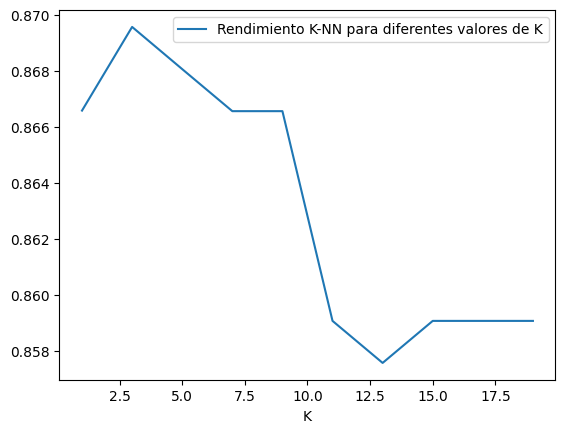

In [71]:
df_scores.set_index("K")["score"].plot(label="Rendimiento K-NN para diferentes valores de K")
plt.legend()
plt.show();

### **Entrenamiento y Evaluación del modelo**

Aquí entrenaríamos el modelo eligiendo el valor óptimo de ***k=3*** calculado anteriormente, sin embargo elegimos 7 para ilustrar mejor los siguientes pasos.

En cualquier caso, se recomienda al alumno jugar con este valor y observar su efecto en el clasificador.

Como podréis observar, no hemos hecho partición del dataset ya que vamos a realizar una evaluación por validación cruzada. Recordando la introducción, en la validación cruzada en $k$ capas (*folds*), lo que hacemos son $k$ particiones para entrenar con cada una de esas particiones y evaluar con el resto, obteniendo la media de rendimiento de todas estas evaluaciones como la evaluación del modelo. Esto, como podéis imaginar, reduce los problemas de sesgo dependientes de la partición seleccionada al suavizar la evalución mediante la media de todas las evaluaciones cruzadas.


In [72]:
k=7
folds=10

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)
preds = cross_val_predict(knn_model, X, Y, cv=folds, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=folds, scoring="accuracy", n_jobs=3)
print("Accuracy por capa: " , score)
print("Accuracy media: ", np.mean(score))

Accuracy por capa:  [0.86567164 0.88059701 0.85074627 0.89552239 0.88059701 0.8358209
 0.85074627 0.86363636 0.87878788 0.86363636]
Accuracy media:  0.866576209859792


<br/>
<p><mark>RECUERDA</mark></p>
<hr/>

La *accuracy* de un modelo que siempre eligiera la clase mayoritaria, en este caso, sería del 85,75%

Si el clasificador ha obtenido una *accuracy* del 86,80%, esto supone una mejora de tan solo 1,05%

Veámos y analicemos la matriz de confusión:

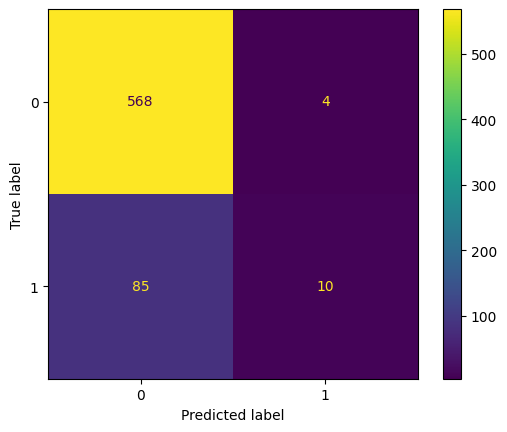

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y, preds)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Observando la matriz de confusión, vemos lo siguiente:

* Cuando el clasificador ha predecido la clase 0 (NO CHURN), lo ha hecho correctamente en 568 casos, fallando en 84 (un 12,88% de las veces).

* Cuando el clasificador ha predecido la clase 1 (CHURN), lo ha hecho correctamente en 11 casos, fallando en 4 (un 26,67% de las veces).

* Cuando el clasificador debía predecir la clase 0 (NO CHURN), lo ha hecho correctamente en 568 casos, fallando en 4 (un 0,70% de las veces).

* Cuando el clasificador debía predecir la clase 1 (CHURN), lo ha hecho correctamente en 11 casos, fallando en 84 (88,42% de las veces).

Lo anterior, que podría traducirse fácilmente en *TP*, *TN*, *FP* y *FN* como vimos en la introducción, da lugar a un desequilibrio bastante grande entre las medidas de precisión y alcance para las dos clases, como podemos observar en el informe de clasificación a continuación (te recomiendo calcular manualmente todas las medidas de evaluación siguiendo las fórmulas del apartado introductorio):


In [74]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       572
           1       0.71      0.11      0.18        95

    accuracy                           0.87       667
   macro avg       0.79      0.55      0.56       667
weighted avg       0.85      0.87      0.82       667



Mirando el informe de clasificación anterior observamos que el problema, como adelantábamos con los cálculos iniciales, se encuentra en la fila para la clase 1 (*churn*), donde especialmente el valor para *recall* y *f1* es muy bajo.



####**Curva *Precision* vs. *Recall***

A continuación, vamos a buscar un equilibrio entre la precisión y el alcance de nuestro modelo en lugar de hacerlo por *accuracy* como lo habíamos hecho inicialmente.

Para ello, vamos a dibujar una gráfica con estas dos métricas, para lo que vamos a necesitar la probabilidad que otorga el método *K-NN* a cada una de sus predicciones.

In [75]:
k=12

knn_model = KNeighborsClassifier(n_neighbors=12, weights=weights, metric=metric)
probs = cross_val_predict(knn_model, X, Y, cv=folds, method="predict_proba", n_jobs=3)
preds = cross_val_predict(knn_model, X, Y, cv=folds, method="predict", n_jobs=3)

In [76]:
probs  ## nos devuelve dos probabilidades, una para cada clase

array([[0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       ...,
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [77]:
probs[:,1]

array([0.08333333, 0.        , 0.08333333, 0.16666667, 0.08333333,
       0.08333333, 0.        , 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25      , 0.16666667,
       0.25      , 0.08333333, 0.        , 0.08333333, 0.16666667,
       0.08333333, 0.        , 0.        , 0.08333333, 0.        ,
       0.        , 0.16666667, 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08333333, 0.        , 0.08333333, 0.        , 0.08333333,
       0.08333333, 0.        , 0.        , 0.        , 0.16666667,
       0.08333333, 0.        , 0.25      , 0.16666667, 0.25      ,
       0.16666667, 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.08333333, 0.41666667, 0.33333333, 0.41666667,
       0.        , 0.        , 0.        , 0.41666667, 0.        ,
       0.        , 0.        , 0.08333333, 0.16666667, 0.08333

In [87]:
df_dict = {"prob_class0": probs[:,0],
           "prob_class1": probs[:,1],
           "preds":preds}

In [88]:
df_probs = pd.DataFrame(df_dict)
df_probs.head()

,prob_class0,prob_class1,preds
0,0.916667,0.083333,0
1,1.000000,0.000000,0
2,0.916667,0.083333,0
3,0.833333,0.166667,0
4,0.916667,0.083333,0


In [89]:
df_probs[df_probs["preds"]==1]["prob_class0"].max()

np.float64(0.4166666666666667)

Por defecto, *K-NN* utiliza 50% como umbral para discriminar entre clases.

Modificando este umbral vamos a poder dar mayor o menor peso a las métricas *precision* o *recall* de nuestro modelo. Por ejemplo:

* Si subimos el límite de 50% a 70%, ¿qué ocurre?

Al ser más estrictos para que una predicción sea 1, tendremos menos FP y aumentará la *Precision*.

* Si bajamos el límite de 50% a 20%, ¿qué ocurre?

Al ser menos estrictos para que una predicción sea 1, tendremos menos FN y aumentará *Recall*.





In [81]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(Y,probs[:,1])

print("Métricas *precision* vs. *recall*")
print("---------------------------------")
print("Precision: ", precision)
print("Recall: ", recall)
print("Umbral: ", threshold)

Métricas *precision* vs. *recall*
---------------------------------
Precision:  [0.14242879 0.23495702 0.43125    0.6091954  0.68965517 0.64516129
 0.75       0.66666667 1.         1.        ]
Recall:  [1.         0.86315789 0.72631579 0.55789474 0.42105263 0.21052632
 0.09473684 0.04210526 0.02105263 0.        ]
Umbral:  [0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667]


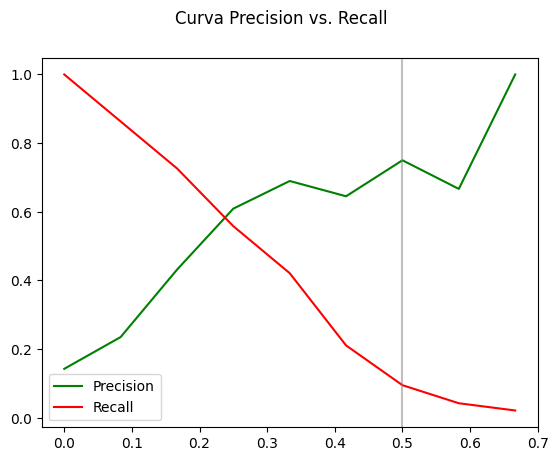

In [82]:
plt.plot(threshold, precision[:-1], c="green", label="Precision")
plt.plot(threshold, recall[:-1], c="red", label="Recall")
plt.axvline(0.5, alpha=0.5, c="gray")
plt.suptitle("Curva Precision vs. Recall")
plt.legend()
plt.show()

La línea vertical en el umbral del 50% corta a las curvas *precision* y *recall* en los valores 0.79 y 0.30 respectivamente, lo que significa que se prima la precisión frente al alcance.

<br/>
<p><mark>PIENSA UN MINUTO</mark></p>
<hr/>

En el caso en el que estamos, ¿qué preferimos, una alta *precision* o un alto *recall*?

Suponiendo que somos Orange Telecom y que lo que queremos es minimizar el número de abandonos, deberíamos priorizar encontrar al máximo posible de ellos aunque tengamos falsos negativos detectando clientes satisfechos como clientes en riesgo (coste menor que perder a un cliente insatisfecho por no haberlo detectado a tiempo).

En otras palabras, deberíamos reducir el número de *FN (falsos negativos)*, lo que implica aumentar el *recall*, lo que atendiendo a la curva *Precision* vs. *Recall* graficada anteriormente, implicará reducir el umbral. Probemos con diferentes valores:

In [90]:
df_probs["preds_10"] = 0
df_probs["preds_20"] = 0
df_probs["preds_30"] = 0

df_probs.loc[df_probs["prob_class1"]>0.1, "preds_10"] = 1
df_probs.loc[df_probs["prob_class1"]>0.2, "preds_20"] = 1
df_probs.loc[df_probs["prob_class1"]>0.3, "preds_30"] = 1

df_probs

,prob_class0,prob_class1,preds,preds_10,preds_20,preds_30
0,0.916667,0.083333,0,0,0,0
1,1.000000,0.000000,0,0,0,0
2,0.916667,0.083333,0,0,0,0
3,0.833333,0.166667,0,1,0,0
4,0.916667,0.083333,0,0,0,0
...,...,...,...,...,...,...
662,1.000000,0.000000,0,0,0,0
663,0.916667,0.083333,0,0,0,0
664,0.916667,0.083333,0,0,0,0
665,1.000000,0.000000,0,0,0,0


Las matrices de confusión y los informes de clasificación ahora serían:

**Umbral = 10**

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       572
           1       0.43      0.73      0.54        95

    accuracy                           0.82       667
   macro avg       0.69      0.78      0.72       667
weighted avg       0.88      0.82      0.84       667



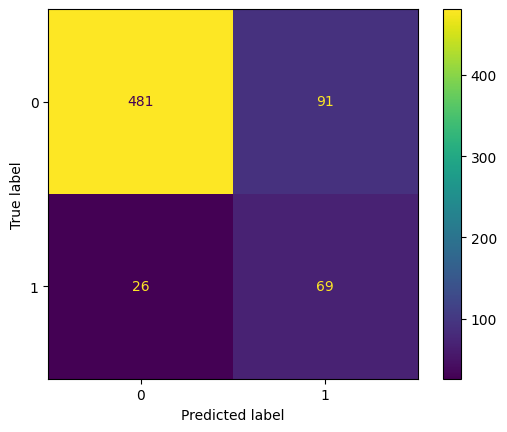

In [91]:
preds10=df_probs["preds_10"].values
cm = confusion_matrix(Y, preds10)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds10)}")


**Umbral = 20**

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       572
           1       0.61      0.56      0.58        95

    accuracy                           0.89       667
   macro avg       0.77      0.75      0.76       667
weighted avg       0.88      0.89      0.88       667



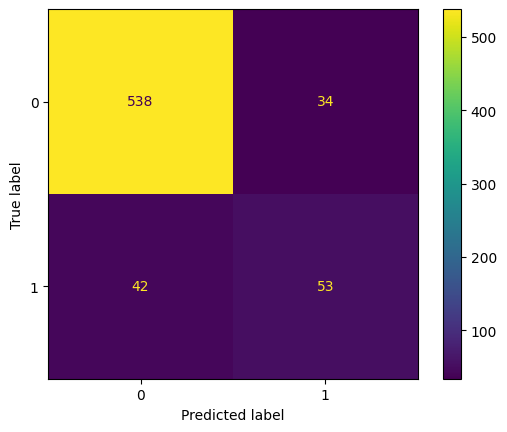

In [85]:
preds20=df_probs["preds_20"].values
cm = confusion_matrix(Y, preds20)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds20)}")

**Umbral = 30**

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       572
           1       0.69      0.42      0.52        95

    accuracy                           0.89       667
   macro avg       0.80      0.69      0.73       667
weighted avg       0.88      0.89      0.88       667



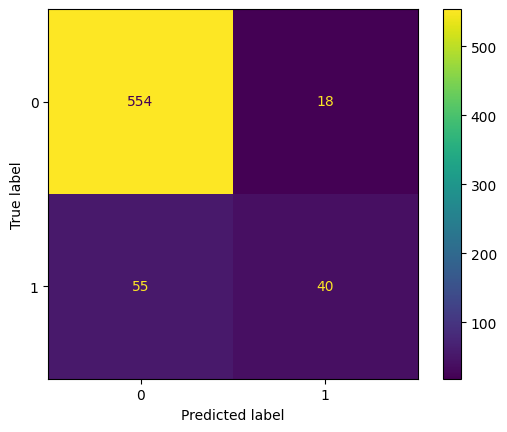

In [86]:
preds30=df_probs["preds_30"].values
cm = confusion_matrix(Y, preds30)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds30)}")

<br/>
<p><mark>NOTA</mark><p>
<hr/>

A partir de los resultados anteriores, la empresa estaría en condiciones de decidir el umbral óptimo para sus operaciones, para lo que dados los números anteriores, deberá equilibrar entre:

* Contactar a más clientes, con el coste asociado, donde un elevado número no están insatisfechos, pero asegurando que se contacta al mayor número posible de los que sí que lo están.

* Contactar a menos clientes, con el riesgo de no contactar a un mayor número de clientes insatisfechos y que finalmente opten por abandonar los servicios ofrecidos por la compañía.

En cualquier caso, ahora esta información está cuantificada y el tomador de la decisión no va con su propia intuición sino soportada por datos (*data-driven decision making*).



# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong><i> K-NN </i> </center> </strong> </h1> </p>
<hr>
<br> 

* El algoritmo K-NN es un **método de aprendizaje supervisado** para la **clasificación** y **regresión**.

* *K-NN* se basa en la idea de que **instancias similares** tienden a estar **cerca** en un espacio $n$-dimensional. Por tanto, la idea principal es encontrar los **K vecinos más cercanos a una instancia de prueba** en un conjunto de datos y utilizar la **clase o valor de respuesta mayoritario** entre los vecinos **para predecir la clase** o valor de respuesta para la instancia de prueba.

* El valor de $K$ se refiere al **número de vecinos** que se consideran para realizar la predicción.


* Para la clasificación, **la distancia** entre las instancias se mide utilizando medidas de distancia como la **euclidiana**, la de **Manhattan**, la de **Minkowski**, entre otras.

* Para la **regresión** , se utiliza el **promedio ponderado** de los valores de respuesta de los vecinos más cercanos.

* *K-NN* tiene ventajas, como su **simplicidad** y **facilidad de implementación**, y desventajas, como la **necesidad de almacenar y calcular distancias para todo el conjunto de datos** y la **sensibilidad al ruido** y a los **valores atípicos**.

* *K-NN* también puede ser útil en la **selección de características** y en la exploración de datos.

* Entre las librerías que se encuentran para implementar *K-NN* tenemos **scikit-learn** en **Python**, **caret** en **R**, y **Weka** en **Java**.